In [253]:
# Dependencies
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from scipy import stats
import numpy as np
import pandas as pd
from pathlib import Path

In [228]:
# load and clean crime datasets
def load_crime_data(datasets, path):
    df = pd.DataFrame()
    for dataset in datasets:
        # load the csv file
        file_path = Path(f"{path}{dataset}.csv")
        temp_df = pd.read_csv(file_path)
        # add the region
        temp_df["region"] = dataset
        df = pd.concat([df, temp_df])
    return df

In [229]:
# Load crime data set into pandas

regions = ["goldfields-esperance", "mandurah", "mirrabooka", "south_west", "armadale", "great_southern", "perth", "wheatbelt", "cannington", "joondalup", "mid_west-gascoyne", "plibara", "fremantle", "kimberley", "midland"]
metro_region = ["metropolitan", "regional"]

crime_all_df = load_crime_data(regions, 'crime-data/wa_crime_')
crime_metro_region_all_df = load_crime_data(metro_region, 'crime-data/wa_crime_')

crime_metro_region_all_df.head()

,Month and Year,Homicide Total,Murder,Attempted / Conspiracy to Murder,Manslaughter,Driving Causing Death,Recent Sexual Offence Total,Sexual Assault,Non-Assaultive Sexual Offences,Historical Sexual Offence Total,...,Fraud & Related Offences Total,Forgery,Fraud (Credit Card),Fraud (Not Elsewhere Classified),Breach of Violence Restraint Order Total,Breach of Family Violence Restraint Order,Breach of Violence Restraint Order,Breach of Police Order,Total Selected Miscellaneous Offences,region
0,Jan-07,9,4,2,0,3,160,104,56,62,...,513,31,0,482,346,250,63,33,NaN,metropolitan
1,Feb-07,2,0,0,0,2,130,87,43,75,...,452,17,0,435,341,231,81,29,1802.0,metropolitan
2,Mar-07,5,3,1,0,1,122,94,28,67,...,500,15,0,485,470,342,101,27,2273.0,metropolitan
3,Apr-07,0,0,0,0,0,139,88,51,206,...,393,5,0,388,351,272,50,29,1698.0,metropolitan
4,May-07,12,3,3,1,5,150,106,44,91,...,645,14,0,631,414,314,75,25,2133.0,metropolitan


In [231]:
# convert the dates
dates = pd.to_datetime(crime_metro_region_all_df['Month and Year'], format='%b-%y')
last_days = dates + pd.offsets.MonthEnd(1)
crime_metro_region_all_df['Month and Year'] = last_days
crime_metro_region_all_df = crime_metro_region_all_df.rename(columns={'Month and Year': 'Date'})
crime_metro_region_all_df = crime_metro_region_all_df.set_index('Date')

In [240]:
file_path = Path("other-data/immigration-data.csv")
immigration_df = pd.read_csv(file_path)
immigration_df = immigration_df[['DateTime', 'WA']]
dates = pd.to_datetime(immigration_df['DateTime'], format='ISO8601')
immigration_df['DateTime'] = dates
immigration_df = immigration_df.rename(columns={'DateTime': 'Date', 'WA': 'WA total immigration'})
immigration_df['Date1'] = immigration_df['Date'].copy()

immigration_df = immigration_df.set_index('Date')

immigration_df.head()

,WA total immigration,Date1
Date,,
2010-06-30,28866,2010-06-30
2010-09-30,29365,2010-09-30
2010-12-31,31897,2010-12-31
2011-03-31,34334,2011-03-31
2011-06-30,36425,2011-06-30


In [241]:

# change to quarterly data & resize the dataset to fit
crime_quarterly_df = crime_metro_region_all_df.resample('Q').sum()
crime_quarterly_df = crime_quarterly_df.loc['2010-06-01':'2022-07-01']

#remove the unwanted columns
#Homicide
del crime_quarterly_df['Murder']
del crime_quarterly_df['Attempted / Conspiracy to Murder']
del crime_quarterly_df['Manslaughter']
del crime_quarterly_df['Driving Causing Death']
# Recent Sexual Offences		
del crime_quarterly_df['Sexual Assault']
del crime_quarterly_df['Non-Assaultive Sexual Offences']
# Historical Sexual Offences		
del crime_quarterly_df['Sexual Assault.1']
del crime_quarterly_df['Non-Assaultive Sexual Offences.1']
# Assault (Family)		
del crime_quarterly_df['Serious Assault (Family)']
del crime_quarterly_df['Common Assault (Family)']
# Assault (Family)		
del crime_quarterly_df['Serious Assault (Non-Family)']
del crime_quarterly_df['Common Assault (Non-Family)']
del crime_quarterly_df['Assault Police Officer']
#Threatening Behaviour (Family)		
del crime_quarterly_df['Threatening Behaviour (Family)']
del crime_quarterly_df['Possess Weapon to Cause Fear (Family)']
#Threatening Behaviour (Non-Family)	
del crime_quarterly_df['Threatening Behaviour (Non-Family)']
del crime_quarterly_df['Possess Weapon to Cause Fear (Non-Family)']	
# Deprivation of Liberty		
del crime_quarterly_df['Deprivation of Liberty']
del crime_quarterly_df['Kidnapping / Child Stealing']
# Robbery
del crime_quarterly_df['Robbery (Non-Business)']
del crime_quarterly_df['Robbery (Business)']
# Burglary		
del crime_quarterly_df['Burglary (Non-Dwelling)']
del crime_quarterly_df['Burglary (Dwelling)']
# Stealing		
del crime_quarterly_df['Stealing (Not Elsewhere Classified)']
del crime_quarterly_df['Stealing as a Servant']
del crime_quarterly_df['Stealing From Other Premises or Place']
del crime_quarterly_df['Stealing From Dwelling']
del crime_quarterly_df['Stealing From Retail Premises (Shoplift)']
del crime_quarterly_df['Stealing From Motor Vehicle (Contents or Parts)']				
# Property Damage	
del crime_quarterly_df['Criminal Damage']
del crime_quarterly_df['Damage']	
# Arson	
del crime_quarterly_df['Other Fire Related Offences']
del crime_quarterly_df['Cause Damage by Fire']
del crime_quarterly_df['Cause Bushfire']
# Drug Offences	
del crime_quarterly_df['Other Drug Offences']
del crime_quarterly_df['Cultivate or Manufacture Drugs']
del crime_quarterly_df['Possession of Drug Paraphernalia']
del crime_quarterly_df['Drug Possession']
del crime_quarterly_df['Drug Dealing']
# Breach of Violence Restraint Order
del crime_quarterly_df['Breach of Police Order']
del crime_quarterly_df['Breach of Violence Restraint Order']
del crime_quarterly_df['Breach of Family Violence Restraint Order']
#Fraud & Related Offences
del crime_quarterly_df['Forgery']
del crime_quarterly_df['Fraud (Credit Card)']
del crime_quarterly_df['Fraud (Not Elsewhere Classified)']
del crime_quarterly_df['region']
#immigration_df

# add all the crime together
crime_quarterly_df['Total Crime'] = crime_quarterly_df.sum(axis=1)

# merge the datasets based on dates
immigration_vs_crime_df = crime_quarterly_df.merge(immigration_df, on="Date")
immigration_vs_crime_df = immigration_vs_crime_df[['Total Crime', 'WA total immigration', 'Date1']]
immigration_vs_crime_df['Total Crime'] = immigration_vs_crime_df['Total Crime'].astype(int)
immigration_vs_crime_df.head()


,Total Crime,WA total immigration,Date1
Date,,,
2010-06-30,143215,28866,2010-06-30
2010-09-30,143151,29365,2010-09-30
2010-12-31,156431,31897,2010-12-31
2011-03-31,163356,34334,2011-03-31
2011-06-30,159244,36425,2011-06-30


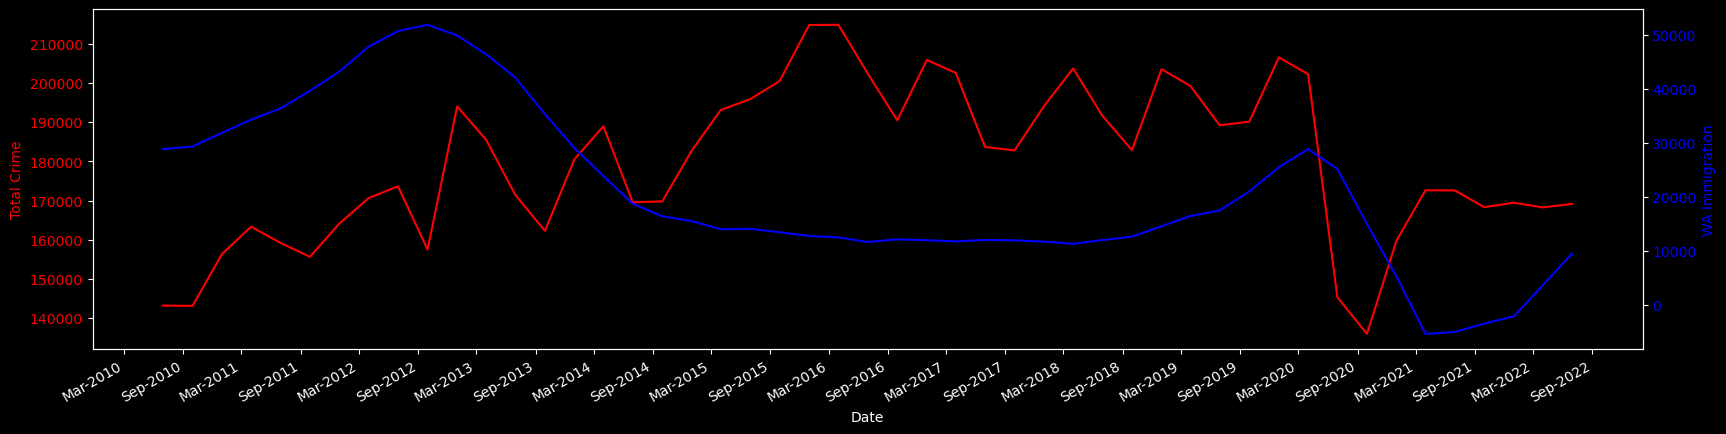

In [265]:
# create a scatter plot
"""x_values = population_vs_crime_df['Total Crime']
y_values = population_vs_crime_df['WA total immigration']
plt.scatter(x_values,y_values)
plt.xlabel('Total Crime')
plt.ylabel('WA total immigration')
plt.show()"""

# get the R value

# create a line graph
fig, ax1 = plt.subplots() 

fig.set_size_inches(20, 5)

ax1.set_xlabel('Date') 
ax1.set_ylabel('Total Crime', color = 'red') 
ax1.plot(immigration_vs_crime_df['Date1'],immigration_vs_crime_df['Total Crime'], color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red') 

# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('WA Immigration', color = 'blue') 
ax2.plot(immigration_vs_crime_df['Date1'],immigration_vs_crime_df['WA total immigration'], color = 'blue')
ax2.tick_params(axis ='y', labelcolor = 'blue') 


# set monthly locator
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
# set formatter
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()
# Show plot
plt.show()

In [234]:
file_path = Path("other-data/population-data.csv")
population_df = pd.read_csv(file_path)

population_df = population_df.rename(columns={'Unnamed: 0': 'Date', 'Estimated Resident Population ;  Persons ;  Western Australia ;': 'WA Population'})
population_df = population_df.iloc[10:]

dates = pd.to_datetime(population_df['Date'], format='%b-%Y')
last_days = dates + pd.offsets.MonthEnd(1)
population_df['Date'] = last_days
population_df['Date1'] = population_df['Date'].copy()

population_df = population_df[['Date', 'WA Population', 'Date1']]
population_df = population_df.set_index('Date')

population_df.head()

,WA Population,Date1
Date,,
1981-09-30,1311284,1981-09-30
1981-12-31,1320221,1981-12-31
1982-03-31,1329700,1982-03-31
1982-06-30,1338899,1982-06-30
1982-09-30,1348096,1982-09-30


In [238]:
population_vs_crime_df = crime_quarterly_df.merge(population_df, on="Date")

population_vs_crime_df = population_vs_crime_df[['Total Crime', 'WA Population', 'Date1']]
population_vs_crime_df['Total Crime'] = population_vs_crime_df['Total Crime'].astype(int)
population_vs_crime_df['WA Population'] = population_vs_crime_df['WA Population'].astype(int)

population_vs_crime_df['WA Population'] = population_vs_crime_df['WA Population']

population_vs_crime_df.head()


,Total Crime,WA Population,Date1
Date,,,
2010-06-30,143215,2290845,2010-06-30
2010-09-30,143151,2305415,2010-09-30
2010-12-31,156431,2319063,2010-12-31
2011-03-31,163356,2337611,2011-03-31
2011-06-30,159244,2353409,2011-06-30


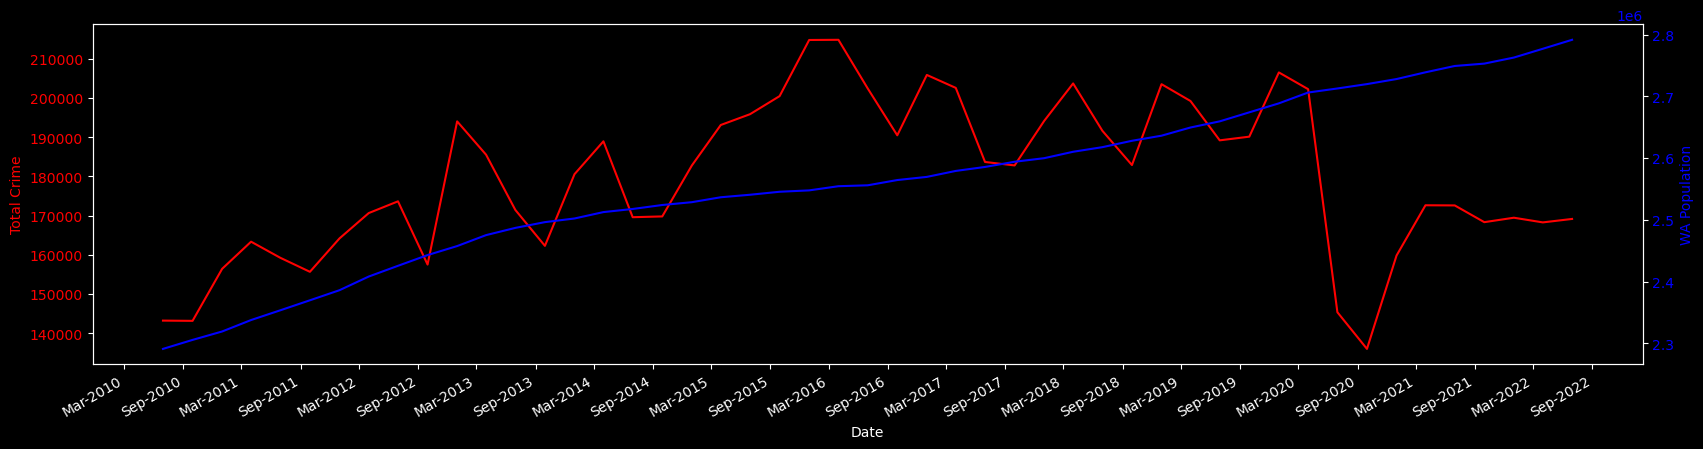

In [266]:
fig, ax1 = plt.subplots() 

fig.set_size_inches(20, 5)

ax1.set_xlabel('Date') 
ax1.set_ylabel('Total Crime', color = 'red') 
ax1.plot(population_vs_crime_df['Date1'],population_vs_crime_df['Total Crime'], color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red') 

# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('WA Population', color = 'blue') 
ax2.plot(population_vs_crime_df['Date1'],population_vs_crime_df['WA Population'], color = 'blue')
ax2.tick_params(axis ='y', labelcolor = 'blue') 
 
# set monthly locator
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
# set formatter
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()

# Show plot

plt.show()